In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
 
temperature = ctrl.Antecedent(np.arange(-10,50,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,70,1),'humidity')
 
duration = ctrl.Consequent(np.arange(0,90,1),'duration')
 
temperature['COLD']=fuzz.trimf(temperature.universe,[-10,0,3])
temperature['COOL']=fuzz.trimf(temperature.universe,[0,8,15])
temperature['NORMAL']=fuzz.trimf(temperature.universe,[12,20,27])
temperature['WARM']=fuzz.trimf(temperature.universe,[24,32,39])
temperature['HOT']=fuzz.trimf(temperature.universe,[36,43,50])
 
humidity['DRY']=fuzz.trimf(humidity.universe,[0,10,20])
humidity['MOIST']=fuzz.trimf(humidity.universe,[10,30,50])
humidity['WET']=fuzz.trimf(humidity.universe,[40,55,70])
 
duration['SHORT']=fuzz.trimf(duration.universe,[0,10,28])
duration['MEDIUM']=fuzz.trimf(duration.universe,[20,32,48])
duration['LONG']=fuzz.trimf(duration.universe,[40,70,90])

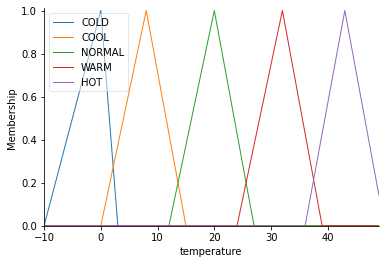

In [ ]:
temperature.view()

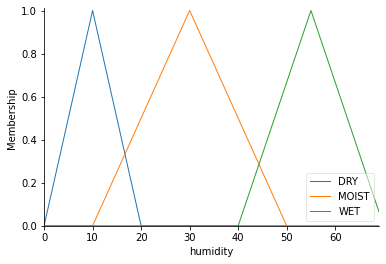

In [ ]:
humidity.view()

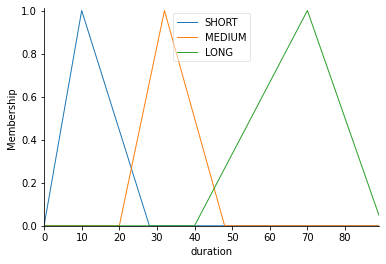

In [ ]:
duration.view()

In [ ]:
rule1 = ctrl.Rule(temperature['COLD'] & humidity['DRY'], duration['LONG'])
rule2 = ctrl.Rule(temperature['COOL'] & humidity['DRY'], duration['LONG'])
rule3 = ctrl.Rule(temperature['NORMAL'] & humidity['DRY'], duration['LONG'])
rule4 = ctrl.Rule(temperature['WARM'] & humidity['DRY'], duration['LONG'])
rule5 = ctrl.Rule(temperature['HOT'] & humidity['DRY'], duration['LONG'])

rule6 = ctrl.Rule(temperature['COLD'] & humidity['MOIST'], duration['LONG'])
rule7 = ctrl.Rule(temperature['COOL'] & humidity['MOIST'], duration['MEDIUM'])
rule8 = ctrl.Rule(temperature['NORMAL'] & humidity['MOIST'], duration['MEDIUM'])
rule9 = ctrl.Rule(temperature['WARM'] & humidity['MOIST'], duration['MEDIUM'])
rule10 = ctrl.Rule(temperature['HOT'] & humidity['MOIST'], duration['MEDIUM'])

rule11 = ctrl.Rule(temperature['COLD'] & humidity['WET'], duration['SHORT'])
rule12 = ctrl.Rule(temperature['COOL'] & humidity['WET'], duration['SHORT'])
rule13 = ctrl.Rule(temperature['NORMAL'] & humidity['WET'], duration['SHORT'])
rule14 = ctrl.Rule(temperature['WARM'] & humidity['WET'], duration['SHORT'])
rule15 = ctrl.Rule(temperature['HOT'] & humidity['WET'], duration['SHORT'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d1de2e910>)

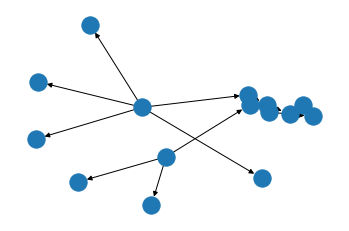

In [ ]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d1d5c2790>)

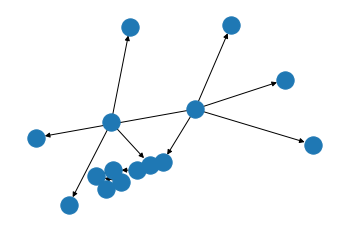

In [ ]:
rule10.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d1d88c110>)

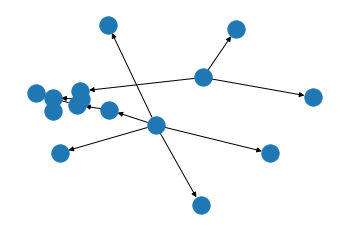

In [ ]:
rule15.view()

In [ ]:
sprinkling_water_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                       rule11, rule12, rule13, rule14, rule15])

In [ ]:
sprinklingwater = ctrl.ControlSystemSimulation(sprinkling_water_ctrl)

In [ ]:
sprinklingwater.input['temperature'] = 12
sprinklingwater.input['humidity'] = 25

sprinklingwater.compute()

33.61038961038961


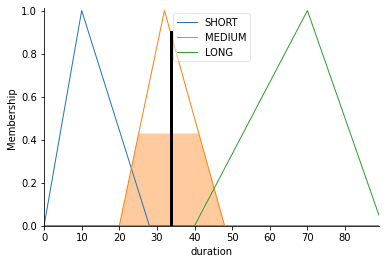

In [ ]:
print(sprinklingwater.output['duration'])
duration.view(sim=sprinklingwater)